<a href="https://colab.research.google.com/github/kimiabaheri-cpu/AER850_Project_2/blob/main/Project2_Step5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Model expects input size: 224x224
Saved: test_crack_result.png


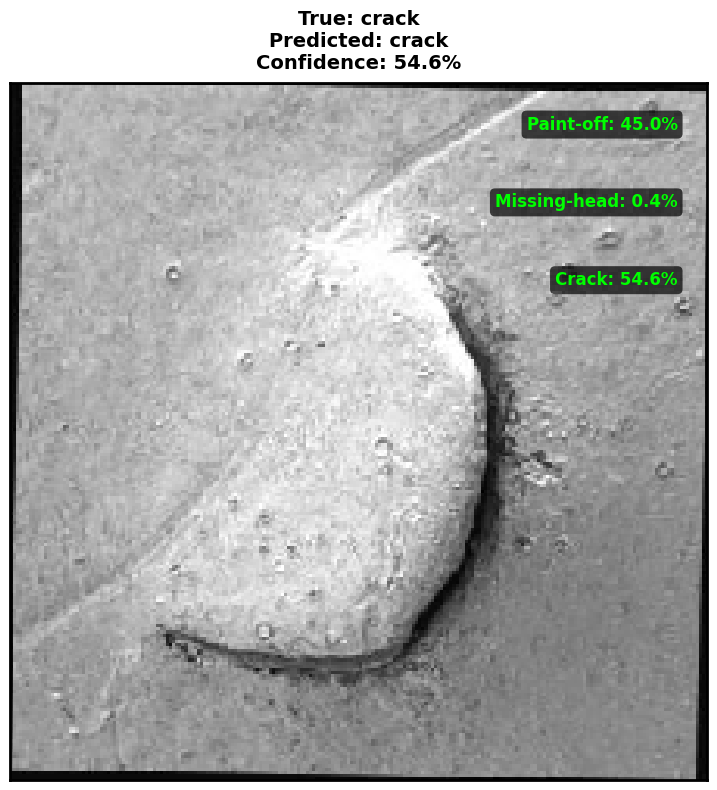

Saved: test_missing-head_result.png


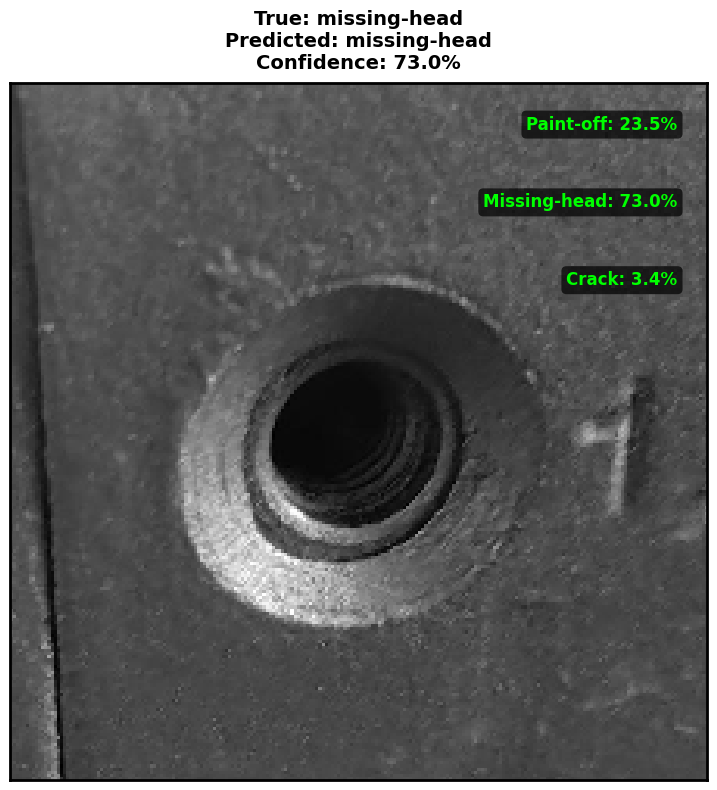

Saved: test_paint-off_result.png


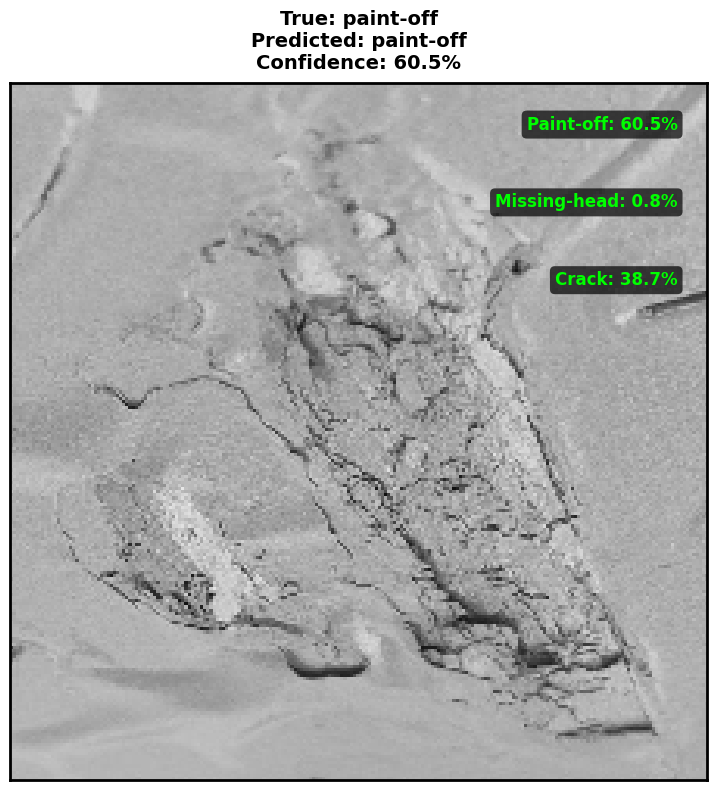

In [3]:
"""
AER850 Project 2; Step 5: Model Testing
Name: Kimia Baheri
Course: AER 850
Section: 01
Last 4 digits of ID: 2879
"""

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/final_model.keras')

# input size from the model
model_input_shape = model.input_shape
img_height, img_width = model_input_shape[1], model_input_shape[2]

print(f"Model expects input size: {img_height}x{img_width}")

# Define class labels
class_labels = ['paint-off', 'missing-head', 'crack']

# Define test image paths
test_images = {
    'crack': '/content/drive/MyDrive/ColabNotebooks/Data/test/crack/test_crack.jpg',
    'missing-head': '/content/drive/MyDrive/ColabNotebooks/Data/test/missing-head/test_missinghead.jpg',
    'paint-off': '/content/drive/MyDrive/ColabNotebooks/Data/test/paint-off/test_paintoff.jpg'
}

# Process and save each test image separately
for true_label, img_path in test_images.items():
    # Load and preprocess image with model's expected size
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_normalized = img_array / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)

    # Make prediction
    predictions = model.predict(img_batch, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    # Create individual figure
    fig = plt.figure(figsize=(8, 8), facecolor='white')
    ax = plt.subplot(1, 1, 1)
    ax.set_facecolor('white')

    # Plot image
    ax.imshow(img_normalized)

    # Add probability text
    for i, label in enumerate(class_labels):
        prob_text = f"{label.capitalize()}: {predictions[0][i]*100:.1f}%"
        ax.text(img_width - 10, 10 + i*25, prob_text,
                color='lime', fontsize=12, fontweight='bold',
                ha='right', va='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7, edgecolor='none'))

    # Title
    title_text = f"True: {true_label}\nPredicted: {predicted_class}\nConfidence: {confidence*100:.1f}%"
    ax.set_title(title_text, fontsize=14, fontweight='bold', color='black', pad=10)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Black border
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    plt.tight_layout()

    # Save individual image
    output_filename = f'/content/drive/MyDrive/ColabNotebooks/test_{true_label}_result.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"Saved: test_{true_label}_result.png")
    plt.show()
    plt.close()